## Multiple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
house= pd.read_csv(r'C:\Users\excel\OneDrive\Desktop\Housing_data.csv')

In [3]:
house.head()

,Price,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
0,16858,1629,1.0,3,0.76,180,0
1,26049,1344,2.0,3,0.92,13,0
2,26130,822,1.0,2,0.56,173,0
3,31113,1540,1.0,2,0.04,115,0
4,40932,1320,1.0,3,0.17,90,0


In [4]:
house.shape

(1047, 7)

In [5]:
house.size

7329

In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       1047 non-null   int64  
 1   LivingArea  1047 non-null   int64  
 2   Bathrooms   1047 non-null   float64
 3   Bedrooms    1047 non-null   int64  
 4   LotSize     1047 non-null   float64
 5   Age         1047 non-null   int64  
 6   Fireplace   1047 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 57.4 KB


In [7]:
house.isnull().sum()

Price         0
LivingArea    0
Bathrooms     0
Bedrooms      0
LotSize       0
Age           0
Fireplace     0
dtype: int64

In [8]:
house.columns

Index(['Price', 'LivingArea', 'Bathrooms', 'Bedrooms', 'LotSize', 'Age',
       'Fireplace'],
      dtype='object')

In [9]:
house.describe()

,Price,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
count,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000
mean,163862.125119,1807.302770,1.918338,3.183381,0.569580,28.061127,0.593123
std,67651.558917,641.460916,0.641735,0.750265,0.777879,34.900899,0.491486
min,16858.000000,672.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,112014.000000,1336.000000,1.500000,3.000000,0.210000,6.000000,0.000000
50%,151917.000000,1672.000000,2.000000,3.000000,0.390000,18.000000,1.000000
75%,205235.000000,2206.000000,2.500000,4.000000,0.600000,34.000000,1.000000
max,446436.000000,4534.000000,4.500000,6.000000,9.000000,247.000000,1.000000


In [10]:
target= house['Price']

In [11]:
target

0        16858
1        26049
2        26130
3        31113
4        40932
         ...  
1042    387652
1043    391842
1044    394532
1045    432845
1046    446436
Name: Price, Length: 1047, dtype: int64

In [12]:
features= house.drop('Price',axis=1)

In [13]:
features

,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
0,1629,1.0,3,0.76,180,0
1,1344,2.0,3,0.92,13,0
2,822,1.0,2,0.56,173,0
3,1540,1.0,2,0.04,115,0
4,1320,1.0,3,0.17,90,0
...,...,...,...,...,...,...
1042,3504,2.5,5,0.90,0,1
1043,3003,3.5,4,0.46,88,1
1044,3361,3.5,4,0.71,1,1
1045,3250,2.5,3,0.53,23,1


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.75, random_state=50)

In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(785, 6)
(785,)
(262, 6)
(262,)


In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lin_model= LinearRegression()

In [20]:
lin_model.fit(x_train,y_train)

LinearRegression()

In [21]:
y_pred= lin_model.predict(x_test)

In [23]:
y_pred.shape

(262,)

In [24]:
y_test.shape

(262,)

In [25]:
lin_model.coef_

array([   71.01773164, 12495.81330579, -5377.02839843,  2954.13683419,
        -215.08955664, 10517.92407482])

In [26]:
lin_model.intercept_

26308.72407431784

In [27]:
sse= ((y_test-y_pred)**2).sum()

In [28]:
sse

524426101944.0738

In [29]:
sst= ((y_test-y_test.mean())**2).sum()

In [30]:
sst

1222763407835.332

In [31]:
Rsquared= 1-(sse/sst)
Rsquared

0.5711140040799311

In [32]:
lin_model.score(x_test,y_test)

0.5711140040799311

<Axes: xlabel='Price'>

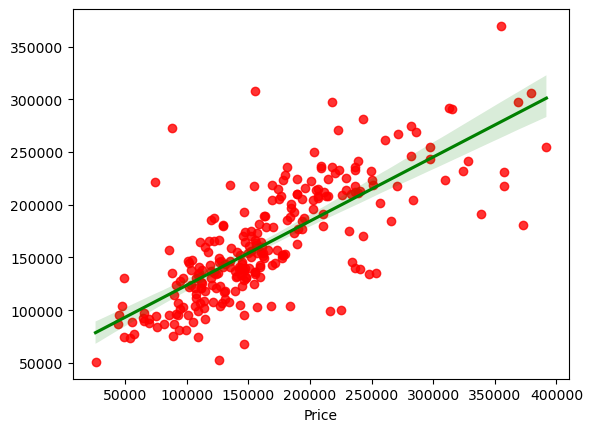

In [35]:
sns.regplot(data=house,x=y_test,y=y_pred,scatter_kws={'color':'red'},line_kws={'color':'green'})

In [36]:
y_test

1040    379472
1037    368396
930     249250
931     250723
938     253545
         ...  
633     169876
932     250976
654     174208
331     121680
37       69463
Name: Price, Length: 262, dtype: int64

In [37]:
y_pred

array([306285.35201372, 297309.01731344, 232070.76838866, 223418.10241725,
       135165.0539936 , 184202.85120285, 214839.44754099, 144169.63575151,
       153932.8100808 , 155173.00472819, 102108.51268412, 164671.13151316,
       254336.98167805, 230820.55750062, 182051.44498657, 245800.2813565 ,
       204632.25374506, 123719.1746515 , 134836.81409135, 179650.08129575,
       205202.83484906, 130667.86940342, 156505.78369268, 118167.04748648,
       137589.49570798, 110556.08926145, 211523.32778328, 139566.11554441,
       193179.03939201, 213862.28014514, 215675.83066146,  91871.96753215,
        95207.88788042, 217326.71621832,  74393.64322033, 140745.63115932,
       156686.12739829, 180674.41454785, 235883.30003076, 130177.2310295 ,
        96879.64282898, 118056.68360215, 138185.14256768, 224718.12892987,
       223173.79520075, 150315.36112151, 139939.37305476, 164789.68588089,
       173022.39892679, 140414.50901674, 217820.66391334, 241392.70402325,
       137534.97787496, 1

In [38]:
err= y_test-y_pred
err

1040     73186.647986
1037     71086.982687
930      17179.231611
931      27304.897583
938     118379.946006
            ...      
633      -8892.951844
932      32629.000543
654     -40802.890100
331      13601.880535
37      -18284.247682
Name: Price, Length: 262, dtype: float64

(array([  2.,   1.,   3.,  31., 114.,  80.,  13.,  11.,   6.,   1.]),
 array([-184869.49786241, -147170.93469759, -109472.37153276,
         -71773.80836793,  -34075.2452031 ,    3623.31796172,
          41321.88112655,   79020.44429138,  116719.00745621,
         154417.57062103,  192116.13378586]),
 <BarContainer object of 10 artists>)

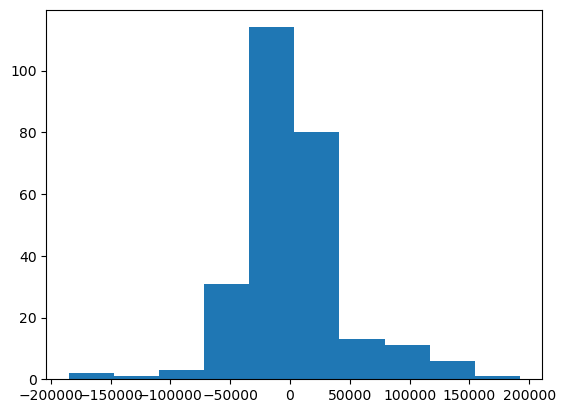

In [39]:
plt.hist(err)

## Labelling the categorical data

In [40]:
df= pd.DataFrame({'ID' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
             'Name' : ['John', 'Jack', 'Mariah', 'Krishna', 'Danny', 'Lisa', 'Andrew', 'Ravi', 'Garima', 'Kavita'],
             'Gender' :['Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female'],
              'Profession' : ['Manager', 'Manager', 'Developer', 'Team Lead', 'Team Lead', 'Assistant Manager', 'Assistant Manager', 'Manager', 'Assistant Manager', 'CEO'],
              'Salary' : [100000, 120000, 95000, 99000, 105000, 145000, 155000, 78000, 167000, 195000],
              'Experience' : [10, 13, 6, 8, 10, 13, 19, 15, 20, 24]})

In [41]:
df

,ID,Name,Gender,Profession,Salary,Experience
0,1,John,Male,Manager,100000,10
1,2,Jack,Male,Manager,120000,13
2,3,Mariah,Female,Developer,95000,6
3,4,Krishna,Male,Team Lead,99000,8
4,5,Danny,Male,Team Lead,105000,10
5,6,Lisa,Female,Assistant Manager,145000,13
6,7,Andrew,Male,Assistant Manager,155000,19
7,8,Ravi,Male,Manager,78000,15
8,9,Garima,Female,Assistant Manager,167000,20
9,10,Kavita,Female,CEO,195000,24


In [42]:
df.size

60

In [43]:
df.shape

(10, 6)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          10 non-null     int64 
 1   Name        10 non-null     object
 2   Gender      10 non-null     object
 3   Profession  10 non-null     object
 4   Salary      10 non-null     int64 
 5   Experience  10 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [46]:
df.describe(include='all')

,ID,Name,Gender,Profession,Salary,Experience
count,10.00000,10,10,10,10.000000,10.000000
unique,NaN,10,2,5,NaN,NaN
top,NaN,John,Male,Manager,NaN,NaN
freq,NaN,1,6,3,NaN,NaN
mean,5.50000,NaN,NaN,NaN,125900.000000,13.800000
std,3.02765,NaN,NaN,NaN,37698.953714,5.731007
min,1.00000,NaN,NaN,NaN,78000.000000,6.000000
25%,3.25000,NaN,NaN,NaN,99250.000000,10.000000
50%,5.50000,NaN,NaN,NaN,112500.000000,13.000000
75%,7.75000,NaN,NaN,NaN,152500.000000,18.000000


In [47]:
df.isnull().sum()

ID            0
Name          0
Gender        0
Profession    0
Salary        0
Experience    0
dtype: int64

In [48]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [49]:
lab_enc= LabelEncoder()

In [50]:
lab_enc.fit(df['Profession'])

LabelEncoder()

In [51]:
lab_enc.classes_

array(['Assistant Manager', 'CEO', 'Developer', 'Manager', 'Team Lead'],
      dtype=object)

In [52]:
df['Profession']=lab_enc.transform(df['Profession'])

In [53]:
df

,ID,Name,Gender,Profession,Salary,Experience
0,1,John,Male,3,100000,10
1,2,Jack,Male,3,120000,13
2,3,Mariah,Female,2,95000,6
3,4,Krishna,Male,4,99000,8
4,5,Danny,Male,4,105000,10
5,6,Lisa,Female,0,145000,13
6,7,Andrew,Male,0,155000,19
7,8,Ravi,Male,3,78000,15
8,9,Garima,Female,0,167000,20
9,10,Kavita,Female,1,195000,24


In [54]:
one_hot= OneHotEncoder()

In [56]:
one_hot.fit(df[['Gender']])

OneHotEncoder()

In [57]:
one_hot_dataframe= pd.DataFrame(one_hot.transform(df[['Gender']]).toarray())

In [58]:
one_hot_dataframe

,0,1
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0
5,1.0,0.0
6,0.0,1.0
7,0.0,1.0
8,1.0,0.0
9,1.0,0.0


In [59]:
df= df.iloc[:,0:6].join(one_hot_dataframe)

In [60]:
df

,ID,Name,Gender,Profession,Salary,Experience,0,1
0,1,John,Male,3,100000,10,0.0,1.0
1,2,Jack,Male,3,120000,13,0.0,1.0
2,3,Mariah,Female,2,95000,6,1.0,0.0
3,4,Krishna,Male,4,99000,8,0.0,1.0
4,5,Danny,Male,4,105000,10,0.0,1.0
5,6,Lisa,Female,0,145000,13,1.0,0.0
6,7,Andrew,Male,0,155000,19,0.0,1.0
7,8,Ravi,Male,3,78000,15,0.0,1.0
8,9,Garima,Female,0,167000,20,1.0,0.0
9,10,Kavita,Female,1,195000,24,1.0,0.0
